**Stock Analysis Using News Headlines**

In [12]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
df=pd.read_csv('Data.csv', encoding = "ISO-8859-1")
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,Derby raise a glass to Strupar's debut double,"Southgate strikes, Leeds pay the penalty",Hammers hand Robson a youthful lesson,Saints party like it's 1999,Wear wolves have turned into lambs,Stump mike catches testy Gough's taunt,Langer escapes to hit 167,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,Hopkins 'furious' at Foster's lack of Hannibal...,Has Cubie killed fees?,A tale of two tails,I say what I like and I like what I say,"Elbows, Eyes and Nipples",Task force to assess risk of asteroid collision,How I found myself at last,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,McGrath puts India out of their misery,Blair Witch bandwagon rolls on,Pele turns up heat on Ferguson,Party divided over Kohl slush fund scandal,Manchester United (England),Women in record South Pole walk,Vasco da Gama (Brazil),South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,2000-01-06,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,England's decade of disasters,Revenge is sweet for jubilant Cronje,"Our choice, not theirs",Profile of former US Nazi Party officer Willia...,New evidence shows record of war crimes suspec...,The rise of the supernerds,Written on the body,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,2000-01-07,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,Alan Parker - part two,"Thuggery, Toxins and Ties",Met faces fresh attack on race crime,Everton fans top racist 'league of shame',"Our breasts, ourselves",Russia's new boss has an extremely strange his...,Always and forever,Most everywhere: UDIs,Most wanted: Chloe lunettes,

In [14]:
cnull=df.isnull().sum()
sumnull=df.isnull().sum().sum()
print(cnull)
print("null values",sumnull)

Date     0
Label    0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    1
Top24    3
Top25    3
dtype: int64
null values 7


In [15]:
df.replace(to_replace = np.nan, value = 'abc')

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,Derby raise a glass to Strupar's debut double,"Southgate strikes, Leeds pay the penalty",Hammers hand Robson a youthful lesson,Saints party like it's 1999,Wear wolves have turned into lambs,Stump mike catches testy Gough's taunt,Langer escapes to hit 167,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,Hopkins 'furious' at Foster's lack of Hannibal...,Has Cubie killed fees?,A tale of two tails,I say what I like and I like what I say,"Elbows, Eyes and Nipples",Task force to assess risk of asteroid collision,How I found myself at last,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,McGrath puts India out of their misery,Blair Witch bandwagon rolls on,Pele turns up heat on Ferguson,Party divided over Kohl slush fund scandal,Manchester United (England),Women in record South Pole walk,Vasco da Gama (Brazil),South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,2000-01-06,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,England's decade of disasters,Revenge is sweet for jubilant Cronje,"Our choice, not theirs",Profile of former US Nazi Party officer Willia...,New evidence shows record of war crimes suspec...,The rise of the supernerds,Written on the body,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,2000-01-07,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,Alan Parker - part two,"Thuggery, Toxins and Ties",Met faces fresh attack on race crime,Everton fans top racist 'league of shame',"Our breasts, ourselves",Russia's new boss has an extremely strange his...,Always and forever,Most everywhere: UDIs,Most wanted: Chloe lunettes,

In [16]:
train = df[df['Date'] < '20150101']
test = df[df['Date'] > '20141231']

In [17]:
test.shape

(378, 27)

In [18]:
train.shape

(3975, 27)

In [19]:
# Removing punctuations
data=train.iloc[:,2:27]
data.replace("[^a-zA-Z]"," ",regex=True, inplace=True)

# Renaming column names for ease of access
list1= [i for i in range(25)]
new_Index=[str(i) for i in list1]
data.columns= new_Index
data.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,A hindrance to operations extracts from the...,Scorecard,Hughes instant hit buoys Blues,Jack gets his skates on at ice cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,Derby raise a glass to Strupar s debut double,Southgate strikes Leeds pay the penalty,Hammers hand Robson a youthful lesson,Saints party like it s,Wear wolves have turned into lambs,Stump mike catches testy Gough s taunt,Langer escapes to hit,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl s successor drawn into scandal,The difference between men and women,Sara Denver nurse turned solicitor,Diana s landmine crusade put Tories in a panic,Yeltsin s resignation caught opposition flat f...,Russian roulette,Sold out,Recovering a title
1,Scorecard,The best lake scene,Leader German sleaze inquiry,Cheerio boyo,The main recommendations,Has Cubie killed fees,Has Cubie killed fees,Has Cubie killed fees,Hopkins furious at Foster s lack of Hannibal...,Has Cubie killed fees,A tale of two tails,I say what I like and I like what I say,Elbows Eyes and Nipples,Task force to assess risk of asteroid collision,How I found myself at last,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man s extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn t know without the ...,Millennium bug fails to bite
2,Coventry caught on counter by Flo,United s rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,McGrath puts India out of their misery,Blair Witch bandwagon rolls on,Pele turns up heat on Ferguson,Party divided over Kohl slush fund scandal,Manchester United England,Women in record South Pole walk,Vasco da Gama Brazil,South Melbourne Australia,Necaxa Mexico,Real Madrid Spain,Raja Casablanca Morocco,Corinthians Brazil,Tony s pet project,Al Nassr Saudi Arabia,Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,Auntie back in fashion even if the dress look...,Shoaib appeal goes to the top,Hussain hurt by shambles but lays blame on e...,England s decade of disasters,Revenge is sweet for jubilant Cronje,Our choice not theirs,Profile of former US Nazi Party officer Willia...,New evidence shows record of war crimes suspec...,The rise of the supernerds,Written on the body,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for,Christmas glitches,Upending a table Chopping a line and Scoring ...,Scientific evidence unreliable defence claims,Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake up of failing NHS,Lessons of law s hard heart
4,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers are you all whingers,Hollywood Beyond,Ashes and diamonds,Whingers a formidable minority,Alan Parker part two,Thuggery Toxins and Ties,Met faces fresh attack on race crime,Everton fans top racist league of shame,Our breasts ourselves,Russia s new boss has an extremely strange his...,Always and forever,Most everywhere UDIs,Most wanted Chloe lunettes,Return of the cane completely off the agenda,From Sleepy Hollow to Greeneland,Blunkett outlines vision for over s,Embattled Dobson attacks play now pay later ...,Doom and the Dome,What is the north south divide,Aitken released from jai

In [20]:
# Converting headlines to lower case
for index in new_Index:
    data[index]=data[index].str.lower()
data.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,a hindrance to operations extracts from the...,scorecard,hughes instant hit buoys blues,jack gets his skates on at ice cold alex,chaos as maracana builds up for united,depleted leicester prevail as elliott spoils e...,hungry spurs sense rich pickings,gunners so wide of an easy target,derby raise a glass to strupar s debut double,southgate strikes leeds pay the penalty,hammers hand robson a youthful lesson,saints party like it s,wear wolves have turned into lambs,stump mike catches testy gough s taunt,langer escapes to hit,flintoff injury piles on woe for england,hunters threaten jospin with new battle of the...,kohl s successor drawn into scandal,the difference between men and women,sara denver nurse turned solicitor,diana s landmine crusade put tories in a panic,yeltsin s resignation caught opposition flat f...,russian roulette,sold out,recovering a title


In [21]:
' '.join(str(x) for x in data.iloc[0,0:25])

'a  hindrance to operations   extracts from the leaked reports scorecard hughes  instant hit buoys blues jack gets his skates on at ice cold alex chaos as maracana builds up for united depleted leicester prevail as elliott spoils everton s party hungry spurs sense rich pickings gunners so wide of an easy target derby raise a glass to strupar s debut double southgate strikes  leeds pay the penalty hammers hand robson a youthful lesson saints party like it s      wear wolves have turned into lambs stump mike catches testy gough s taunt langer escapes to hit     flintoff injury piles on woe for england hunters threaten jospin with new battle of the somme kohl s successor drawn into scandal the difference between men and women sara denver  nurse turned solicitor diana s landmine crusade put tories in a panic yeltsin s resignation caught opposition flat footed russian roulette sold out recovering a title'

In [22]:
headlines = []
for row in range(0,len(data.index)):
    headlines.append(' '.join(str(x) for x in data.iloc[row,0:25]))
headlines[0]

'a  hindrance to operations   extracts from the leaked reports scorecard hughes  instant hit buoys blues jack gets his skates on at ice cold alex chaos as maracana builds up for united depleted leicester prevail as elliott spoils everton s party hungry spurs sense rich pickings gunners so wide of an easy target derby raise a glass to strupar s debut double southgate strikes  leeds pay the penalty hammers hand robson a youthful lesson saints party like it s      wear wolves have turned into lambs stump mike catches testy gough s taunt langer escapes to hit     flintoff injury piles on woe for england hunters threaten jospin with new battle of the somme kohl s successor drawn into scandal the difference between men and women sara denver  nurse turned solicitor diana s landmine crusade put tories in a panic yeltsin s resignation caught opposition flat footed russian roulette sold out recovering a title'

In [23]:
countvector=CountVectorizer(ngram_range=(2,2))
traindataset=countvector.fit_transform(headlines)

**Algorithm Used:**

*   **Random Forest**
*   **KNN**

*   **Logistic** **Regression**
*  **RBF SVM**

**1.Random Forest**

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(traindataset,train['Label'])

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [26]:
## Predict for the Test Dataset
test_transform= []
for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))
test_dataset = countvector.transform(test_transform)
predictions = randomclassifier.predict(test_dataset)

In [27]:
## Import library to check accuracy
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [28]:
matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
rf_score=accuracy_score(test['Label'],predictions)
print(rf_score)
report=classification_report(test['Label'],predictions)
print(report) 

[[137  49]
 [  6 186]]
0.8544973544973545
              precision    recall  f1-score   support

           0       0.96      0.74      0.83       186
           1       0.79      0.97      0.87       192

    accuracy                           0.85       378
   macro avg       0.87      0.85      0.85       378
weighted avg       0.87      0.85      0.85       378



True Positive 186
True Negative 137
False Positive 49
False Negative 6


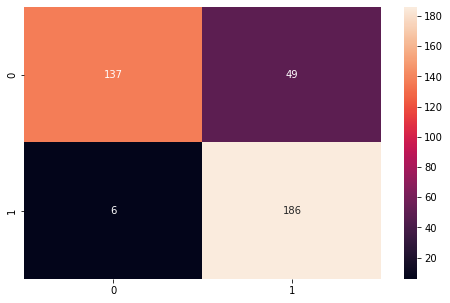

In [29]:
import matplotlib.pyplot as plt
import seaborn as sn
cm = confusion_matrix(test['Label'],predictions)
plt.figure(figsize=(8,5))
sn.heatmap(cm, annot = True,fmt ='d')
print("True Positive",cm[1,1])
print("True Negative",cm[0,0])
print("False Positive",cm[0,1])
print("False Negative",cm[1,0])


**2.KNN**

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
# implement K Neighbors Classifier
kneighborsclassifier=KNeighborsClassifier(n_neighbors=4, weights = "distance")
kneighborsclassifier.fit(traindataset,train['Label'])

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [32]:
## Predict for the Test Dataset
test_transform= []
for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))
test_dataset = countvector.transform(test_transform)
predictions = kneighborsclassifier.predict(test_dataset)

In [33]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [34]:
matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
knn_score=accuracy_score(test['Label'],predictions)
print(knn_score)
report=classification_report(test['Label'],predictions)
print(report)

[[130  56]
 [  0 192]]
0.8518518518518519
              precision    recall  f1-score   support

           0       1.00      0.70      0.82       186
           1       0.77      1.00      0.87       192

    accuracy                           0.85       378
   macro avg       0.89      0.85      0.85       378
weighted avg       0.89      0.85      0.85       378



True Positive 192
True Negative 130
False Positive 56
False Negative 0


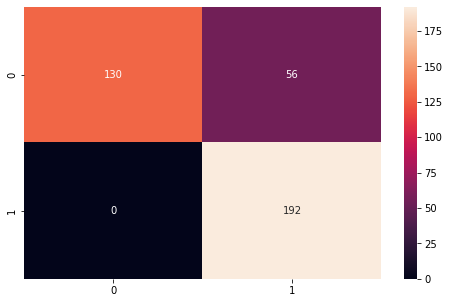

In [35]:
import seaborn as sn
cm = confusion_matrix(test['Label'],predictions)
plt.figure(figsize=(8,5))
sn.heatmap(cm, annot = True,fmt ='d')
print("True Positive",cm[1,1])
print("True Negative",cm[0,0])
print("False Positive",cm[0,1])
print("False Negative",cm[1,0])

**3.Logistic Regression**

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
logisticR=LogisticRegression()
logisticR.fit(traindataset,train['Label'])

LogisticRegression()

In [38]:
test_transform= []
for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))
test_dataset = countvector.transform(test_transform)
predictions = logisticR.predict(test_dataset)

In [39]:
## Import library to check accuracy
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [40]:
matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
lr_score=accuracy_score(test['Label'],predictions)
print(lr_score)
report=classification_report(test['Label'],predictions)
print(report)

[[159  27]
 [ 27 165]]
0.8571428571428571
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       186
           1       0.86      0.86      0.86       192

    accuracy                           0.86       378
   macro avg       0.86      0.86      0.86       378
weighted avg       0.86      0.86      0.86       378



True Positive 165
True Negative 159
False Positive 27
False Negative 27


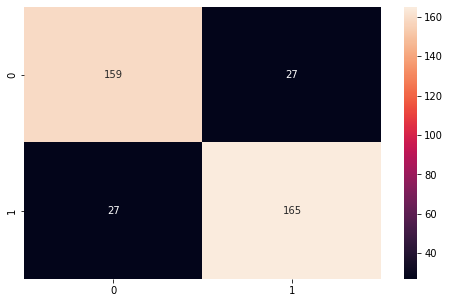

In [41]:
import seaborn as sn
cm = confusion_matrix(test['Label'],predictions)
plt.figure(figsize=(8,5))
sn.heatmap(cm, annot = True,fmt ='d')
print("True Positive",cm[1,1])
print("True Negative",cm[0,0])
print("False Positive",cm[0,1])
print("False Negative",cm[1,0])

**4.RBF SVM**

In [42]:
from sklearn import svm

In [43]:
svmcl=svm.SVC(probability=True,kernel = 'rbf')
svmcl.fit(traindataset,train['Label'])

SVC(probability=True)

In [44]:
## Predict for the Test Dataset
test_transform= []
for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))
test_dataset = countvector.transform(test_transform)
predictions = svmcl.predict(test_dataset)

In [45]:
## Import library to check accuracy
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [46]:
matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
svm_score=accuracy_score(test['Label'],predictions)
print(svm_score)
report=classification_report(test['Label'],predictions)
print(report)

[[130  56]
 [  0 192]]
0.8518518518518519
              precision    recall  f1-score   support

           0       1.00      0.70      0.82       186
           1       0.77      1.00      0.87       192

    accuracy                           0.85       378
   macro avg       0.89      0.85      0.85       378
weighted avg       0.89      0.85      0.85       378



**Neural Network**

In [ ]:
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(alpha=1, max_iter=1000)
mlp.fit(traindataset,train['Label'])
mlp_train_pred = mlp.predict(traindataset)
mlp_score=accuracy_score(test['Label'],mlp_train_pred)

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5) # Define classifier
dt.fit(traindataset,train['Label']) # Train model
dt_train_pred = dt.predict(traindataset)
dt_score=accuracy_score(test['Label'],dt_train_pred)


True Positive 192
True Negative 130
False Positive 56
False Negative 0


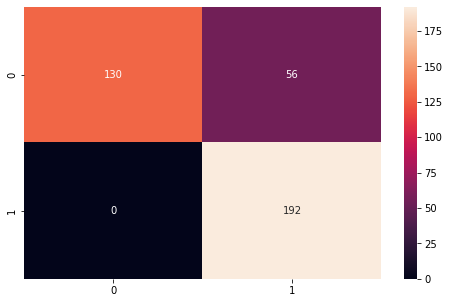

In [47]:
import seaborn as sn
cm = confusion_matrix(test['Label'],predictions)
plt.figure(figsize=(8,5))
sn.heatmap(cm, annot = True,fmt ='d')
print("True Positive",cm[1,1])
print("True Negative",cm[0,0])
print("False Positive",cm[0,1])
print("False Negative",cm[1,0])

**Accuracy Comparison**

# **Stacked model**

In [48]:
# Define estimators
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimator_list = [
('Random forest',randomclassifier),
('knn',kneighborsclassifier),
# ('DT',dt),
('svm',svmcl),
# ('NN',mlp),
('LogisticR',logisticR) ]

stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression()
)
# Train stacked model
stack_model.fit(traindataset,train['Label'])

StackingClassifier(estimators=[('Random forest',
                                RandomForestClassifier(criterion='entropy',
                                                       n_estimators=200)),
                               ('knn',
                                KNeighborsClassifier(n_neighbors=4,
                                                     weights='distance')),
                               ('svm', SVC(probability=True)),
                               ('LogisticR', LogisticRegression())],
                   final_estimator=LogisticRegression())

In [49]:
from sklearn.ensemble import VotingClassifier

model1 = logisticR

model3 = randomclassifier
model4 = svmcl

model = VotingClassifier(estimators=[('lr', model1),('random forest',model3),('svm',model4)], voting='soft')
model.fit(traindataset,train['Label'])
# model.score(x_test,y_test)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('random forest',
                              RandomForestClassifier(criterion='entropy',
                                                     n_estimators=200)),
                             ('svm', SVC(probability=True))],
                 voting='soft')

In [50]:
test_transform= []
for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))
test_dataset = countvector.transform(test_transform)
predictions = model.predict(test_dataset)

matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
voting_score=accuracy_score(test['Label'],predictions)
print(voting_score)
report=classification_report(test['Label'],predictions)
print(report)

[[152  34]
 [ 19 173]]
0.8597883597883598
              precision    recall  f1-score   support

           0       0.89      0.82      0.85       186
           1       0.84      0.90      0.87       192

    accuracy                           0.86       378
   macro avg       0.86      0.86      0.86       378
weighted avg       0.86      0.86      0.86       378



True Positive 192
True Negative 130
False Positive 56
False Negative 0


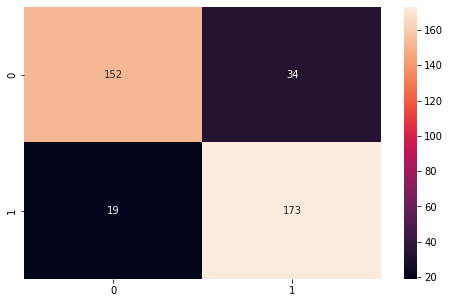

In [51]:
import seaborn as sn
plt.figure(figsize=(8,5))
sn.heatmap(matrix, annot = True,fmt ='d')
print("True Positive",cm[1,1])
print("True Negative",cm[0,0])
print("False Positive",cm[0,1])
print("False Negative",cm[1,0])

In [52]:
import pickle 
model_filename = "model.pkl"

pickle.dump(model,open(model_filename,'wb'))

In [60]:
acc_train_list = {
'svm_rbf': svm_score,
'Logistic Regression': lr_score,
'knn':knn_score,
'RandomForest': rf_score,
'MLP': mlp_score,
'Decision Tree':dt_score,
'VotingClassifier': voting_score}



In [61]:
import pandas as pd

acc_df = pd.DataFrame.from_dict(acc_train_list, orient='index', columns=['Accuracy'])
acc_df

,Accuracy
svm_rbf,0.851852
Logistic Regression,0.857143
knn,0.851852
RandomForest,0.854497
MLP,0.858834
Decision Tree,0.748834
VotingClassifier,0.859788
